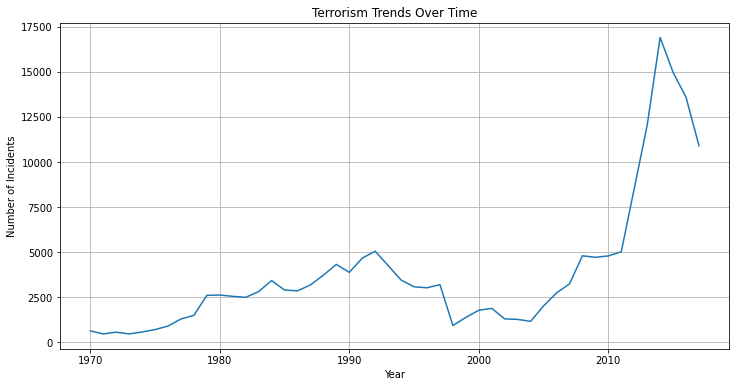

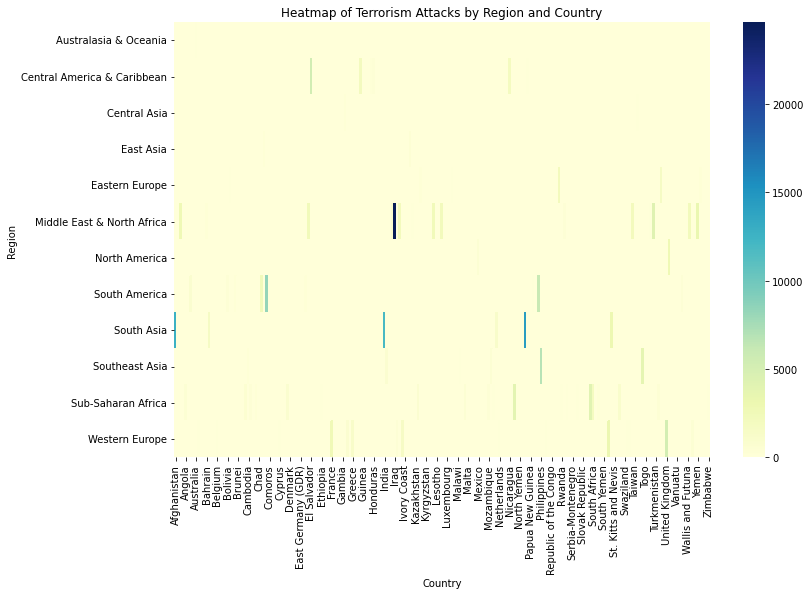

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Local file path to the dataset
file_path = r"D:\Kaggle Compitition\Global Terrorism - START data\globalterrorismdb_0718dist.csv"

# Define the names of problematic columns
problematic_columns = [
    'approxdate', 'resolution', 'country_txt', 'region_txt', 'provstate',
    'city', 'location', 'summary', 'alternative_txt', 'attacktype1_txt',
    'attacktype2_txt', 'attacktype3_txt', 'targtype1_txt',
    'targsubtype1_txt', 'corp1', 'target1', 'natlty1_txt', 'targtype2_txt',
    'targsubtype2_txt', 'corp2', 'target2', 'natlty2_txt', 'targtype3_txt',
    'targsubtype3_txt', 'corp3', 'target3', 'natlty3_txt', 'gname',
    'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive',
    'claimmode_txt', 'claimmode2_txt', 'claimmode3_txt', 'weaptype1_txt',
    'weapsubtype1_txt', 'weaptype2_txt', 'weapsubtype2_txt',
    'weaptype3_txt', 'weapsubtype3_txt', 'weaptype4_txt',
    'weapsubtype4_txt', 'weapdetail', 'propextent_txt', 'propcomment',
    'divert', 'kidhijcountry', 'ransomnote', 'hostkidoutcome_txt',
    'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'related'
]

# Specify data types for problematic columns as 'str'
column_data_types = {col: str for col in problematic_columns}

# Load the dataset with specified data types
data = pd.read_csv(file_path, encoding='ISO-8859-1', dtype=column_data_types)

# Combine 'iyear', 'imonth', and 'iday' columns to create 'event_date'
data['event_date'] = pd.to_datetime(data['iyear'].astype(str) + '-' + data['imonth'].astype(str) + '-' + data['iday'].astype(str), errors='coerce')

# EDA - Terrorism Trends Over Time
yearly_incidents = data['event_date'].dt.year.value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_incidents.index, y=yearly_incidents.values)
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.title('Terrorism Trends Over Time')
plt.grid(True)
plt.show()

# EDA - Heatmap of Attacks
region_country_counts = data.groupby(['region_txt', 'country_txt'])['eventid'].count().unstack(fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(region_country_counts, cmap='YlGnBu', cbar=True)
plt.title('Heatmap of Terrorism Attacks by Region and Country')
plt.xlabel('Country')
plt.ylabel('Region')
plt.show()
